#  1.4.15 Image Segmentation with Watershed Algorithm

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('coin2.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
## inv 는 하연색이 검정 검정색이 하얀된다.
cv2.imshow('detected circles',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
## 노이즈 제거
cv2.imshow('detected circles',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3) #바깥부분 찌그러진거 날아감
cv2.imshow('detected circles',sure_bg)
cv2.waitKey(0)
cv2.destroyAllWindows()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x230ea3dab50>)

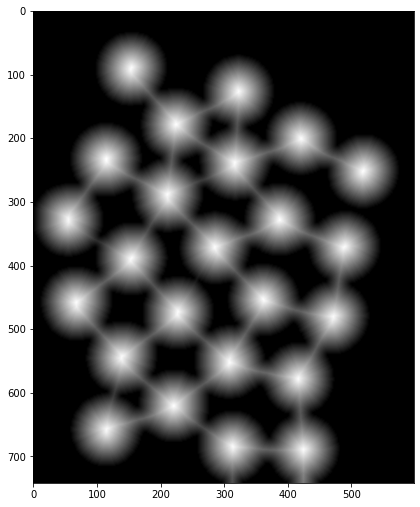

In [22]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
#바운더리 계산을 통해서 첫번째 바운더립 부터 계산 하고 속에 있는부분은 하얀색 바깥은 
#검정이 된다. 이렇게 되면 중심이 찾아져서 동전 수를 측정가능
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(dist_transform, 'gray')

In [23]:
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#70퍼센트 이상인것을 찾는다 그렇게 동전 중심 찾는다

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x230ea432c10>)

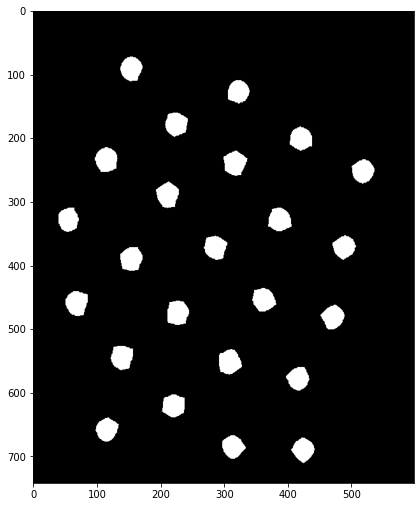

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(sure_fg , 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x230eb7a5160>)

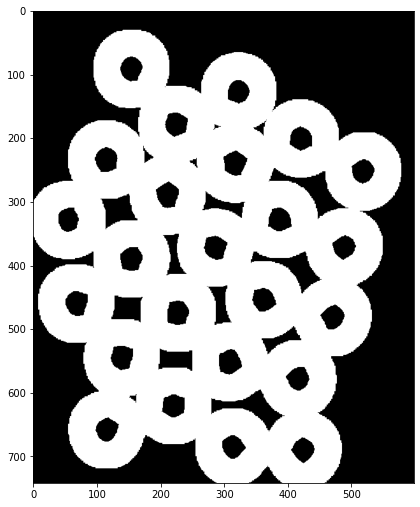

In [27]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(unknown , 'gray')
## 백그라운드에서 포그라운드빼면 모르는부분 남는다.
#cv2.imshow('img',thresh)
#cv2.imshow('opening',opening)
#cv2.imshow('sure_bg',sure_bg).
#cv2.imshow('dist_transform',dist_transform)
#cv2.imshow('sure_bg',sure_fg)
#cv2.imshow('unknown',unknown)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x230eb850910>)

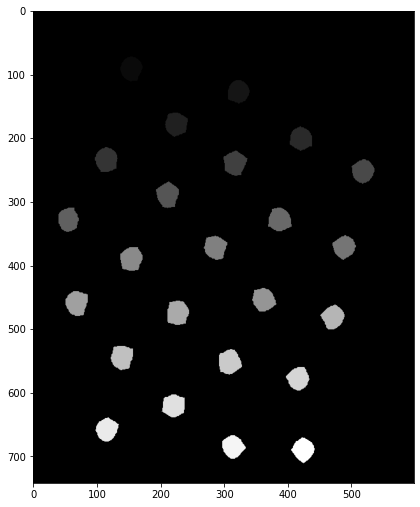

In [29]:
# Marker labelling
sure_fg = np.uint8(sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)  #라벨링
plt.figure(figsize=(15,15))
plt.subplot(121), plt.imshow(markers , 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x230eb8ede20>)

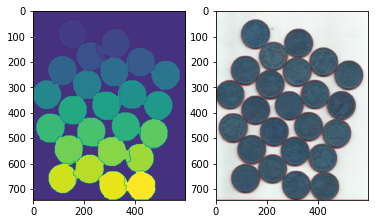

In [32]:
markers = markers+1 
markers[unknown==255] = 0 

markers = cv2.watershed(img,markers)  ##이것을 이용해서 경계를 찾을수있다.
img[markers == -1] = [255,0,0]

plt.subplot(121),plt.imshow(markers)
plt.subplot(122),plt.imshow(img)